In [1]:
import pandas as pd
import numpy as np 
import requests
import csv
import json

In [56]:
url = "https://www.cryptodatadownload.com/cdd/Bitstamp_BTCUSD_d.csv"
data = pd.read_csv(url)
data

,,,,,,,,https://www.CryptoDataDownload.com
unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
1684195200,2023-05-16 00:00:00,BTC/USD,27166,27182,27153,27181,2.75306910,74831.1712071
1684108800,2023-05-15 00:00:00,BTC/USD,26933,27666,26736,27166,1805.12956433,49038149.74458878
1684022400,2023-05-14 00:00:00,BTC/USD,26805,27202,26598,26933,1325.63421938,35703306.43056154
1683936000,2023-05-13 00:00:00,BTC/USD,26816,27052,26710,26789,1269.30464643,34003402.17321327
...,...,...,...,...,...,...,...,...
1417478400,2014-12-02 00:00:00,BTC/USD,378.39,382.86,375.23,379.25,2593576.46,6832.53
1417392000,2014-12-01 00:00:00,BTC/USD,376.4,382.31,373.03,378.39,2520662.37,6660.56
1417305600,2014-11-30 00:00:00,BTC/USD,376.57,381.99,373.32,373.34,1145566.61,3046.33
1417219200,2014-11-29 00:00:00,BTC/USD,376.42,386.6,372.25,376.72,2746157.05,7245.19


In [32]:
df = pd.DataFrame(data)
df

,,,,,,,,https://www.CryptoDataDownload.com
unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
1684195200,2023-05-16 00:00:00,BTC/USD,27166,27182,27153,27181,2.75306910,74831.1712071
1684108800,2023-05-15 00:00:00,BTC/USD,26933,27666,26736,27166,1805.12956433,49038149.74458878
1684022400,2023-05-14 00:00:00,BTC/USD,26805,27202,26598,26933,1325.63421938,35703306.43056154
1683936000,2023-05-13 00:00:00,BTC/USD,26816,27052,26710,26789,1269.30464643,34003402.17321327
...,...,...,...,...,...,...,...,...
1417478400,2014-12-02 00:00:00,BTC/USD,378.39,382.86,375.23,379.25,2593576.46,6832.53
1417392000,2014-12-01 00:00:00,BTC/USD,376.4,382.31,373.03,378.39,2520662.37,6660.56
1417305600,2014-11-30 00:00:00,BTC/USD,376.57,381.99,373.32,373.34,1145566.61,3046.33
1417219200,2014-11-29 00:00:00,BTC/USD,376.42,386.6,372.25,376.72,2746157.05,7245.19


In [119]:
#save data into a csv located in same repo
df.to_csv('testing.csv')

In [68]:
#pull data from csv and organise it into desired dataframe

In [74]:
response = requests.get(url)
response.text

'https://www.CryptoDataDownload.com\nunix,date,symbol,open,high,low,close,Volume BTC,Volume USD\n1684195200,2023-05-16 00:00:00,BTC/USD,27166,27182,27153,27181,2.75306910,74831.1712071\n1684108800,2023-05-15 00:00:00,BTC/USD,26933,27666,26736,27166,1805.12956433,49038149.74458878\n1684022400,2023-05-14 00:00:00,BTC/USD,26805,27202,26598,26933,1325.63421938,35703306.43056154\n1683936000,2023-05-13 00:00:00,BTC/USD,26816,27052,26710,26789,1269.30464643,34003402.17321327\n1683849600,2023-05-12 00:00:00,BTC/USD,26987,27093,25800,26811,4842.98246111,129845202.76482022\n1683763200,2023-05-11 00:00:00,BTC/USD,27624,27640,26720,26991,2126.87109348,57406377.68411868\n1683676800,2023-05-10 00:00:00,BTC/USD,27648,28328,26842,27618,2848.94252300,78682094.600214\n1683590400,2023-05-09 00:00:00,BTC/USD,27688,27841,27372,27650,1573.53076474,43508125.645061\n1683504000,2023-05-08 00:00:00,BTC/USD,28485,28667,27290,27690,2936.79913382,81319968.0154758\n1683417600,2023-05-07 00:00:00,BTC/USD,28909,29194

In [291]:
x = pd.read_csv('testing.csv', header= 1, parse_dates = True)
df2 = pd.DataFrame(x)
df2.index = pd.to_datetime(df2['date'])
df2.columns

Index(['unix', 'date', 'symbol', 'open', 'high', 'low', 'close', 'Volume BTC',
       'Volume USD'],
      dtype='object')

In [285]:
#include date, close, pct change as its own df
#new_df2 = pd.DataFrame(df2[['date', 'close']])
#new_df2 = new_df2.sort_index(ascending=False).reset_index(drop = True)
#pct_change = new_df2['close'].pct_change().dropna().reset_index(drop = True)
#new_df2['percentage change'] = pct_change
#new_df2 = new_df2.set_index('date')
#new_df2.index = pd.to_datetime(new_df2['date'])
new_df2

,date,close
date,,
2023-05-16,2023-05-16 00:00:00,27181.00
2023-05-15,2023-05-15 00:00:00,27166.00
2023-05-14,2023-05-14 00:00:00,26933.00
2023-05-13,2023-05-13 00:00:00,26789.00
2023-05-12,2023-05-12 00:00:00,26811.00
...,...,...
2014-12-02,2014-12-02 00:00:00,379.25
2014-12-01,2014-12-01 00:00:00,378.39
2014-11-30,2014-11-30 00:00:00,373.34


In [317]:
df3 = pd.DataFrame(df2['close'])
daily_pct_change = df3['close'].pct_change()
df3['daily_pct_change'] = daily_pct_change
weekly_pct_change = df3['close'].pct_change(periods = 5)
df3["weekly_pct_change"] = weekly_pct_change

In [326]:
df3.loc['2020-03-08':"2020-03-15"]

,close,daily_pct_change,weekly_pct_change
date,,,
2020-03-15,5343.64,0.061632,-0.139530
2020-03-14,5169.37,-0.032613,-0.163692
2020-03-13,5622.74,0.087703,0.039916
2020-03-12,4841.67,-0.138913,-0.090764
2020-03-11,7934.57,0.638809,0.576377
2020-03-10,7885.92,-0.006131,0.475758
2020-03-09,7936.25,0.006382,0.535245
2020-03-08,8033.70,0.012279,0.428787


<Axes: xlabel='date'>

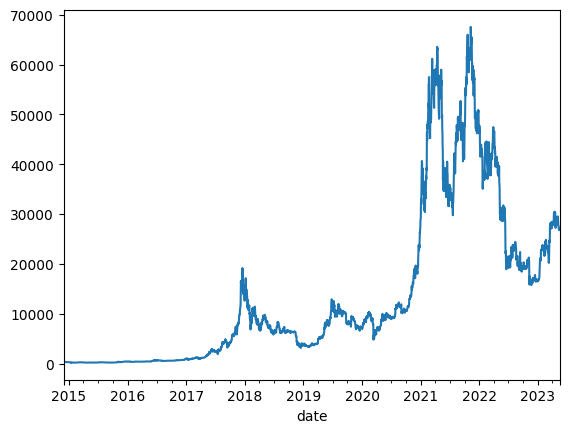

In [329]:
df3['close'].plot()